# LIBRARY IMPORT

In [1]:
import pandas as pd

In [2]:
import plotly.express as px

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import plotly.io as pio

In [6]:
import matplotlib.pyplot as plt

In [7]:
import plotly.graph_objects as go

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.linear_model import LogisticRegression

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# DATA IMPORT

In [17]:
retail=pd.read_csv(r"E:/retail_price.csv")
retail

product_id product_category_name  month_year  qty  total_price  \
0         bed1        bed_bath_table  01-05-2017    1        45.95   
1         bed1        bed_bath_table  01-06-2017    3       137.85   
2         bed1        bed_bath_table  01-07-2017    6       275.70   
3         bed1        bed_bath_table  01-08-2017    4       183.80   
4         bed1        bed_bath_table  01-09-2017    2        91.90   
..         ...                   ...         ...  ...          ...   
671       bed5        bed_bath_table  01-05-2017    1       215.00   
672       bed5        bed_bath_table  01-06-2017   10      2090.00   
673       bed5        bed_bath_table  01-07-2017   59     12095.00   
674       bed5        bed_bath_table  01-08-2017   52     10375.00   
675       bed5        bed_bath_table  01-09-2017   32      5222.36   

     freight_price  unit_price  product_name_lenght  \
0        15.100000   45.950000                   39   
1        12.933333   45.950000                   39   
2        14.840000   45.950000                   39   
3        14.287500   45.950000                   39   
4        15.100000   45.950000                   39   
..             ...         ...                  ...   
671       8.760000  215.000000                   56   
672      21.322000  209.000000                   56   
673      22.195932  205.000000                   56   
674      19.412885  199.509804                   56   
675      24.324687  163.398710                   56   

     product_description_lenght  product_photos_qty  ...  comp_1  ps1  \
0                           161                   2  ...    89.9  3.9   
1                           161                   2  ...    89.9  3.9   
2                           161                   2  ...    89.9  3.9   
3                           161                   2  ...    89.9  3.9   
4                           161                   2  ...    89.9  3.9   
..                          ...                 ...  ...     ...  ...   
671                         162                   5  ...    89.9  3.9   
672                         162                   5  ...    89.9  3.9   
673                         162                   5  ...    89.9  3.9   
674                         162                   5  ...    89.9  3.9   
675                         162                   5  ...    89.9  3.9   

           fp1      comp_2  ps2        fp2  comp_3  ps3        fp3   lag_price  
0    15.011897  215.000000  4.4   8.760000   45.95  4.0  15.100000   45.900000  
1    14.769216  209.000000  4.4  21.322000   45.95  4.0  12.933333   45.950000  
2    13.993833  205.000000  4.4  22.195932   45.95  4.0  14.840000   45.950000  
3    14.656757  199.509804  4.4  19.412885   45.95  4.0  14.287500   45.950000  
4    18.776522  163.398710  4.4  24.324687   45.95  4.0  15.100000   45.950000  
..         ...         ...  ...        ...     ...  ...        ...         ...  
671  15.011897  215.000000  4.4   8.760000   45.95  4.0  15.100000  214.950000  
672  14.769216  209.000000  4.4  21.322000   45.95  4.0  12.933333  215.000000  
673  13.993833  205.000000  4.4  22.195932   45.95  4.0  14.840000  209.000000  
674  14.656757  199.509804  4.4  19.412885   45.95  4.0  14.287500  205.000000  
675  18.776522  163.398710  4.4  24.324687   45.95  4.0  15.100000  199.509804  

[676 rows x 30 columns]

# DATA PREPROCESSING

In [18]:
retail.head()

product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.9  3.9  15.011897  215.000000  4.4   
1                   2  ...    89.9  3.9  14.769216  209.000000  4.4   
2                   2  ...    89.9  3.9  13.993833  205.000000  4.4   
3                   2  ...    89.9  3.9  14.656757  199.509804  4.4   
4                   2  ...    89.9  3.9  18.776522  163.398710  4.4   

         fp2  comp_3  ps3        fp3  lag_price  
0   8.760000   45.95  4.0  15.100000      45.90  
1  21.322000   45.95  4.0  12.933333      45.95  
2  22.195932   45.95  4.0  14.840000      45.95  
3  19.412885   45.95  4.0  14.287500      45.95  
4  24.324687   45.95  4.0  15.100000      45.95  

[5 rows x 30 columns]

In [19]:
retail.tail()

product_id product_category_name  month_year  qty  total_price  \
671       bed5        bed_bath_table  01-05-2017    1       215.00   
672       bed5        bed_bath_table  01-06-2017   10      2090.00   
673       bed5        bed_bath_table  01-07-2017   59     12095.00   
674       bed5        bed_bath_table  01-08-2017   52     10375.00   
675       bed5        bed_bath_table  01-09-2017   32      5222.36   

     freight_price  unit_price  product_name_lenght  \
671       8.760000  215.000000                   56   
672      21.322000  209.000000                   56   
673      22.195932  205.000000                   56   
674      19.412885  199.509804                   56   
675      24.324687  163.398710                   56   

     product_description_lenght  product_photos_qty  ...  comp_1  ps1  \
671                         162                   5  ...    89.9  3.9   
672                         162                   5  ...    89.9  3.9   
673                         162                   5  ...    89.9  3.9   
674                         162                   5  ...    89.9  3.9   
675                         162                   5  ...    89.9  3.9   

           fp1      comp_2  ps2        fp2  comp_3  ps3        fp3   lag_price  
671  15.011897  215.000000  4.4   8.760000   45.95  4.0  15.100000  214.950000  
672  14.769216  209.000000  4.4  21.322000   45.95  4.0  12.933333  215.000000  
673  13.993833  205.000000  4.4  22.195932   45.95  4.0  14.840000  209.000000  
674  14.656757  199.509804  4.4  19.412885   45.95  4.0  14.287500  205.000000  
675  18.776522  163.398710  4.4  24.324687   45.95  4.0  15.100000  199.509804  

[5 rows x 30 columns]

In [20]:
retail.shape

(676, 30)

In [21]:
retail.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [22]:
retail.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

In [23]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [24]:
retail.describe().T

count          mean          std          min  \
qty                         676.0     14.495562    15.443421     1.000000   
total_price                 676.0   1422.708728  1700.123100    19.900000   
freight_price               676.0     20.682270    10.081817     0.000000   
unit_price                  676.0    106.496800    76.182972    19.900000   
product_name_lenght         676.0     48.720414     9.420715    29.000000   
product_description_lenght  676.0    767.399408   655.205015   100.000000   
product_photos_qty          676.0      1.994083     1.420473     1.000000   
product_weight_g            676.0   1847.498521  2274.808483   100.000000   
product_score               676.0      4.085503     0.232021     3.300000   
customers                   676.0     81.028107    62.055560     1.000000   
weekday                     676.0     21.773669     0.986104    20.000000   
weekend                     676.0      8.658284     0.705600     8.000000   
holiday                     676.0      1.494083     0.940430     0.000000   
month                       676.0      6.192308     3.243455     1.000000   
year                        676.0   2017.525148     0.499737  2017.000000   
s                           676.0     14.644970    11.930276     0.484262   
volume                      676.0  10664.627219  9172.801850   640.000000   
comp_1                      676.0     79.452054    47.933358    19.900000   
ps1                         676.0      4.159467     0.121652     3.700000   
fp1                         676.0     18.597610     9.406537     0.095439   
comp_2                      676.0     92.930079    49.481269    19.900000   
ps2                         676.0      4.123521     0.207189     3.300000   
fp2                         676.0     18.620644     6.424174     4.410000   
comp_3                      676.0     84.182642    47.745789    19.900000   
ps3                         676.0      4.002071     0.233292     3.500000   
fp3                         676.0     17.965007     5.533256     7.670000   
lag_price                   676.0    107.399684    76.974657    19.850000   

                                    25%          50%           75%       max  
qty                            4.000000    10.000000     18.000000    122.00  
total_price                  333.700000   807.890000   1887.322500  12095.00  
freight_price                 14.761912    17.518472     22.713558     79.76  
unit_price                    53.900000    89.900000    129.990000    364.00  
product_name_lenght           40.000000    51.000000     57.000000     60.00  
product_description_lenght   339.000000   501.000000    903.000000   3006.00  
product_photos_qty             1.000000     1.500000      2.000000      8.00  
product_weight_g             348.000000   950.000000   1850.000000   9750.00  
product_score                  3.900000     4.100000      4.200000      4.50  
customers                     34.000000    62.000000    116.000000    339.00  
weekday                       21.000000    22.000000     23.000000     23.00  
weekend                        8.000000     9.000000      9.000000     10.00  
holiday                        1.000000     1.000000      2.000000      4.00  
month                          3.000000     6.000000      8.000000     12.00  
year                        2017.000000  2018.000000   2018.000000   2018.00  
s                              7.510204    11.316760     17.745704    100.00  
volume                      3510.000000  8000.000000  15750.000000  32736.00  
comp_1                        49.910000    69.900000    104.256549    349.90  
ps1                            4.100000     4.200000      4.200000      4.50  
fp1                           13.826429    16.618984     19.732500     57.23  
comp_2                        53.900000    89.990000    117.888889    349.90  
ps2                            4.100000     4.200000      4.200000      4.40  
fp2                           14.485000    16.811765  

In [25]:
print(retail.isnull().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


# EDA

In [26]:
#to find categorical and numerical variables
cat_cols=retail.select_dtypes(include=["object"]).columns
num_cols =retail.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['product_id', 'product_category_name', 'month_year'], dtype='object')
Numerical Variables:
['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']


qty


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


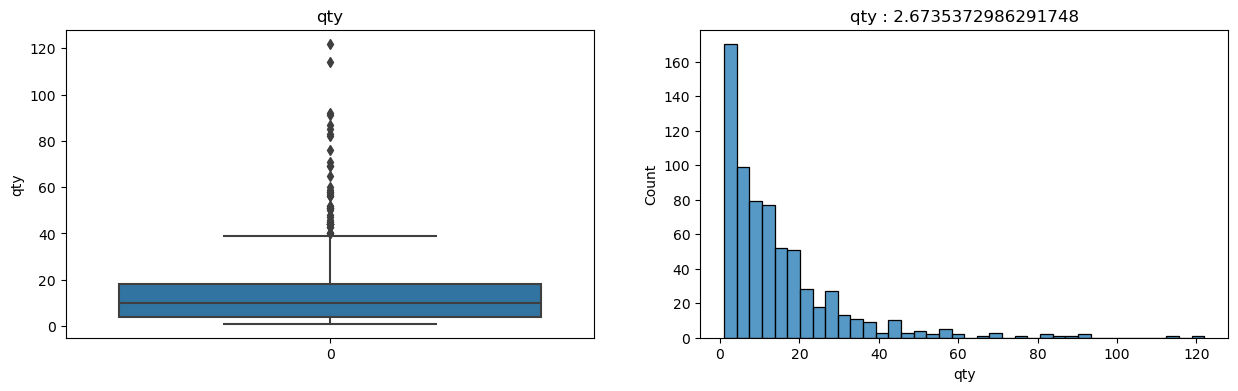

total_price


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


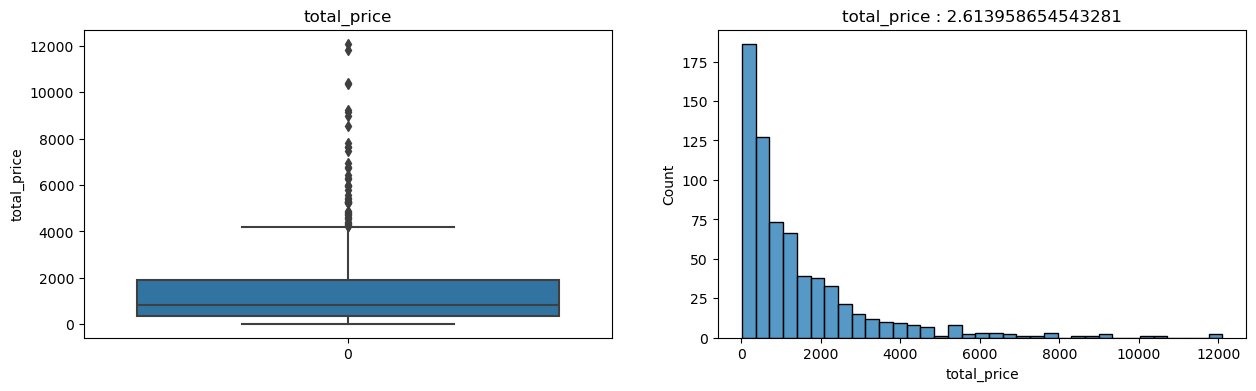

freight_price


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


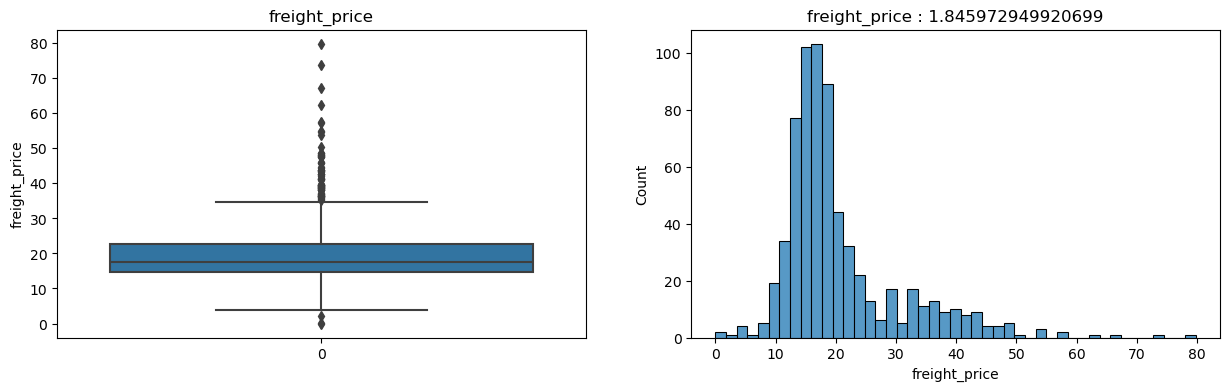

unit_price


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


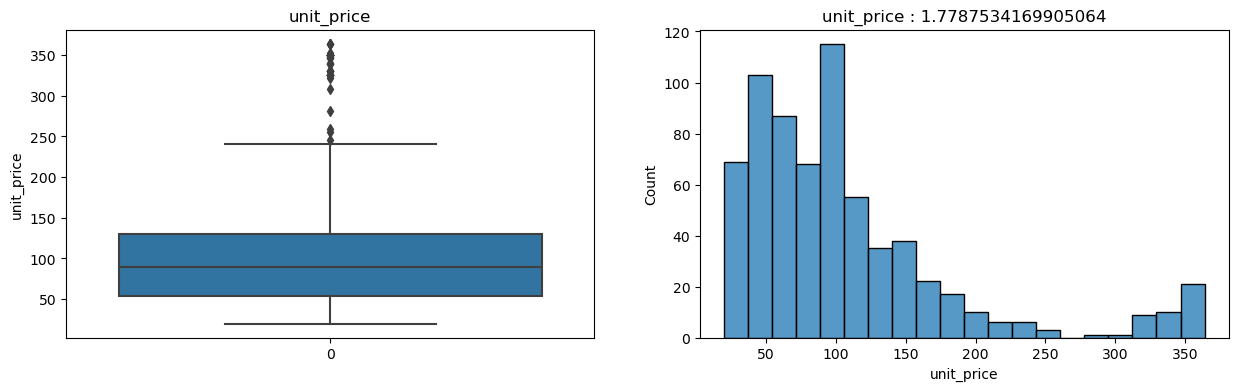

product_name_lenght


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


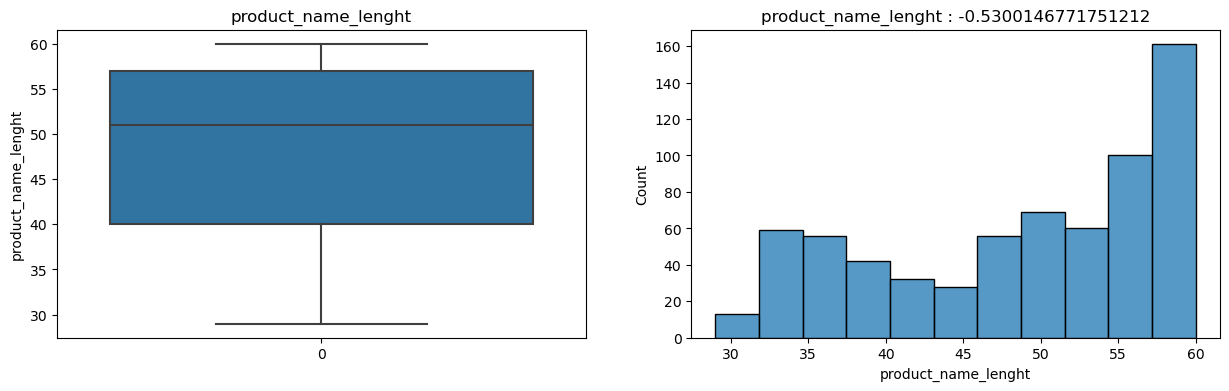

product_description_lenght


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


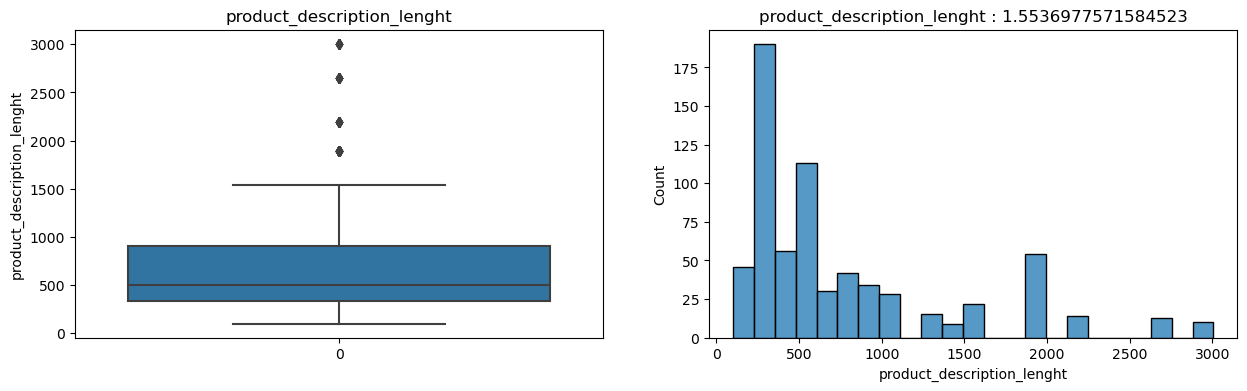

product_photos_qty


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


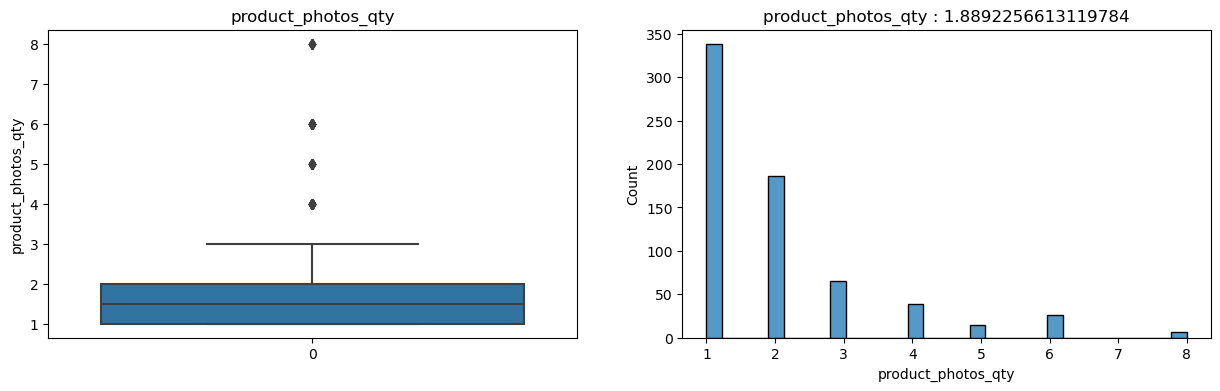

product_weight_g


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


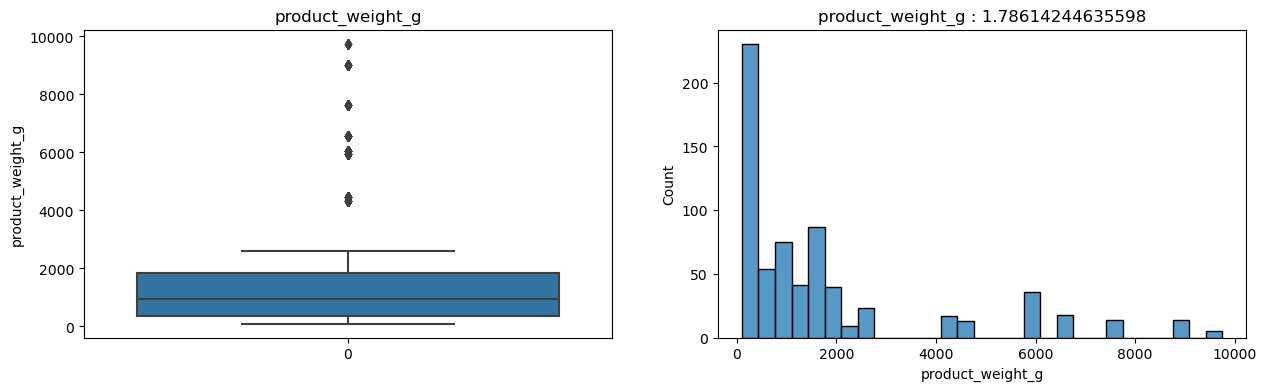

product_score


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


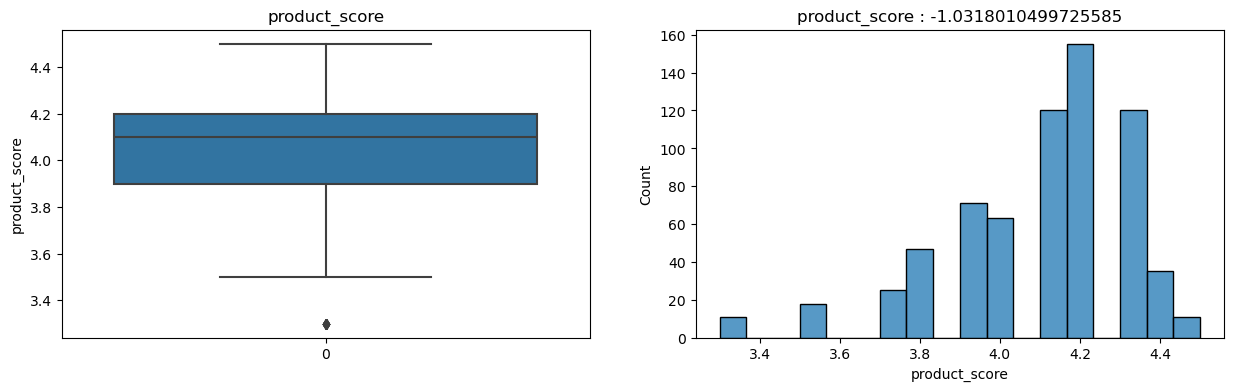

customers


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


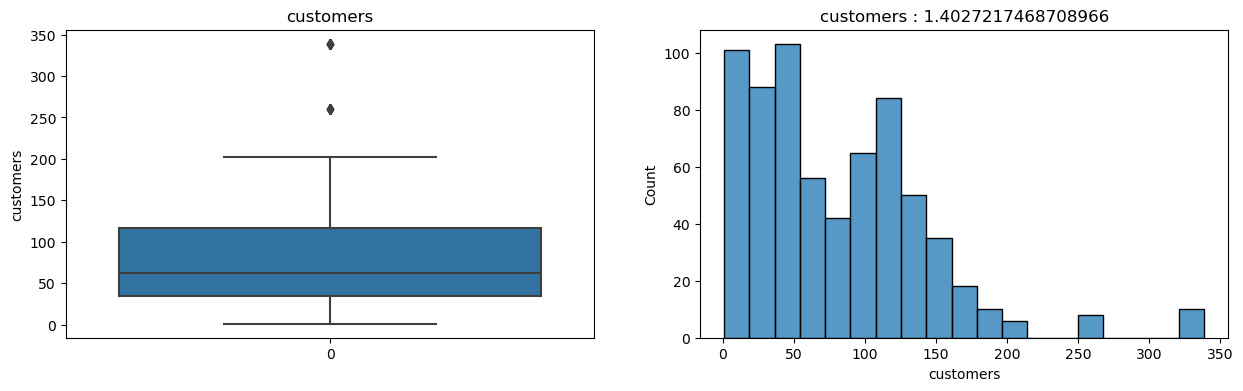

weekday


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


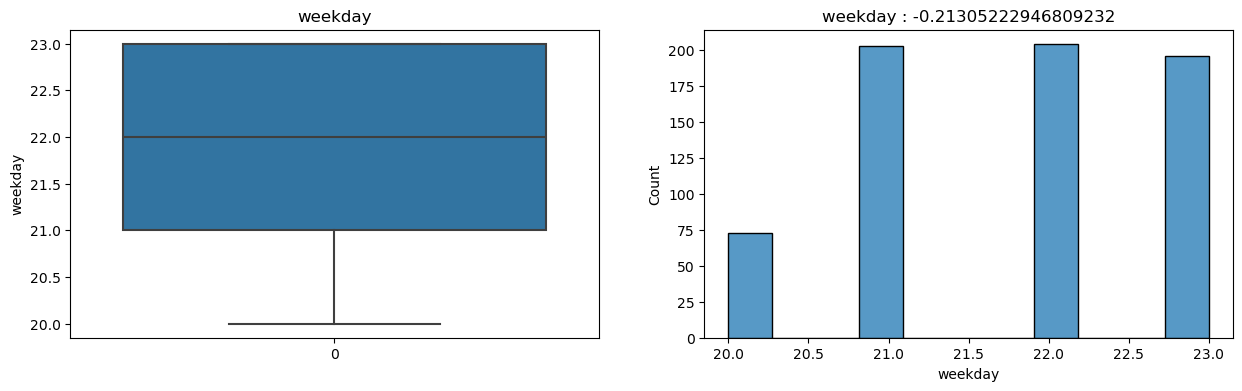

weekend


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


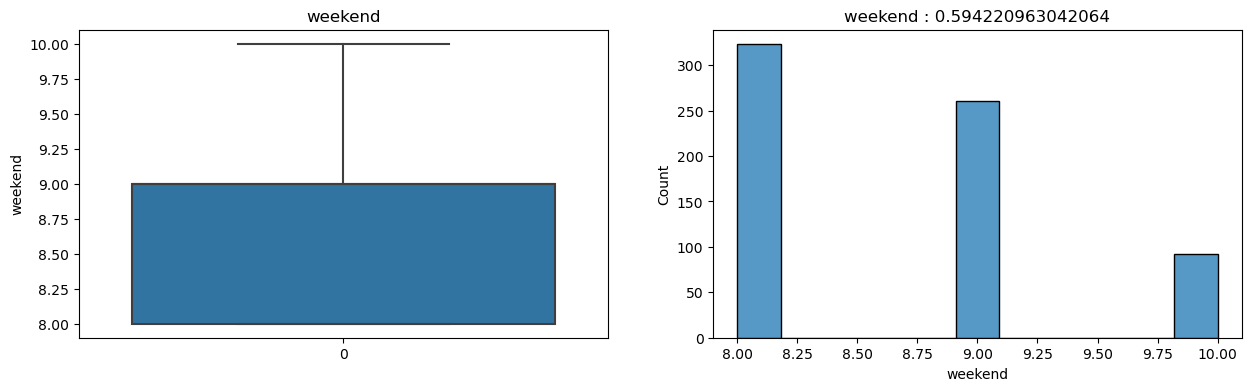

holiday


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


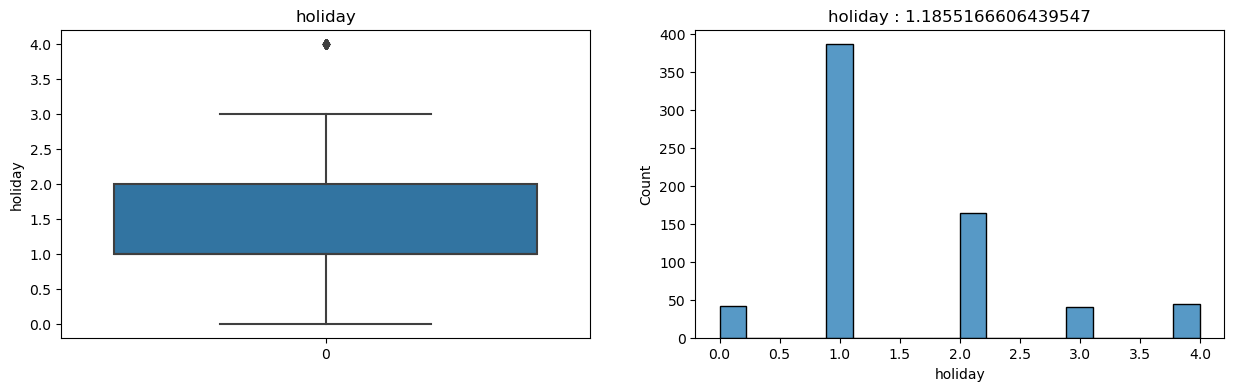

month


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


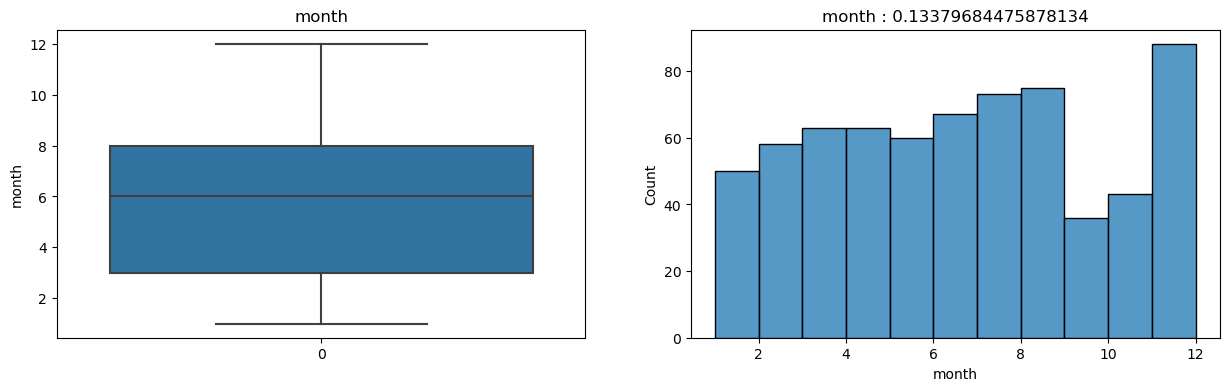

year


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


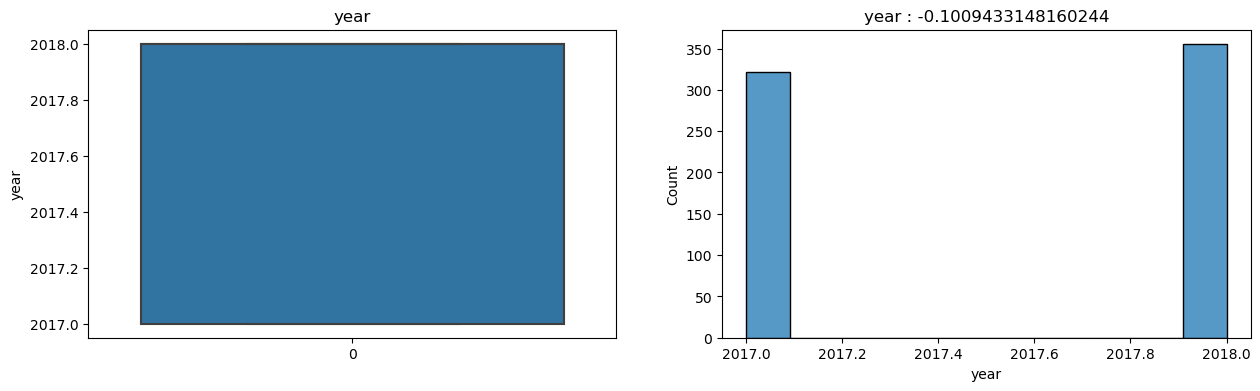

s


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


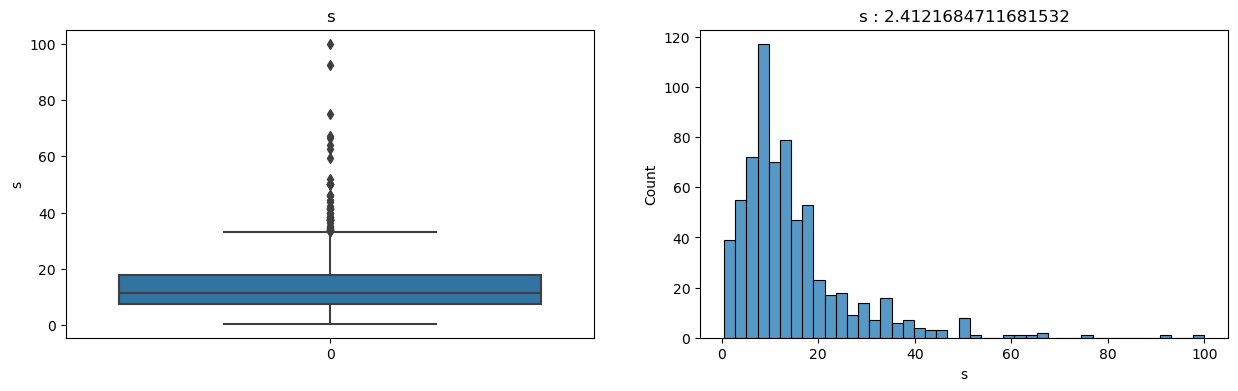

volume


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


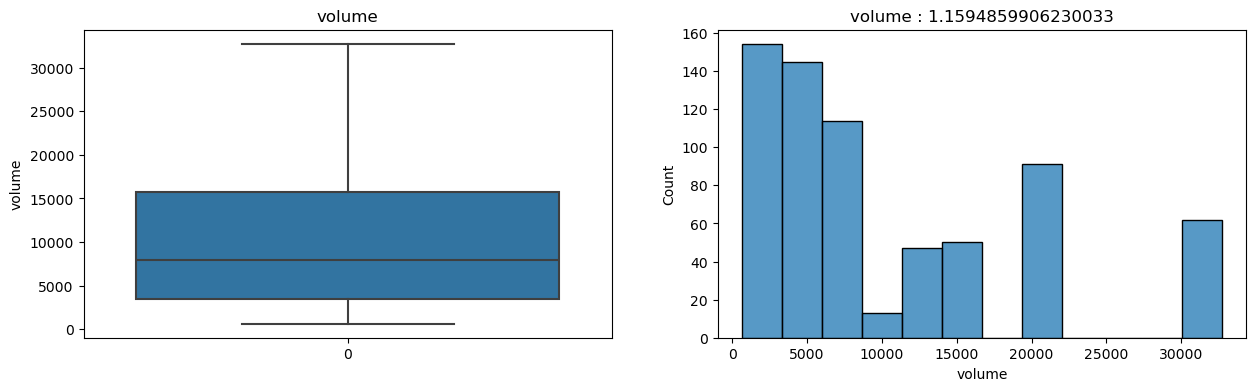

comp_1


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


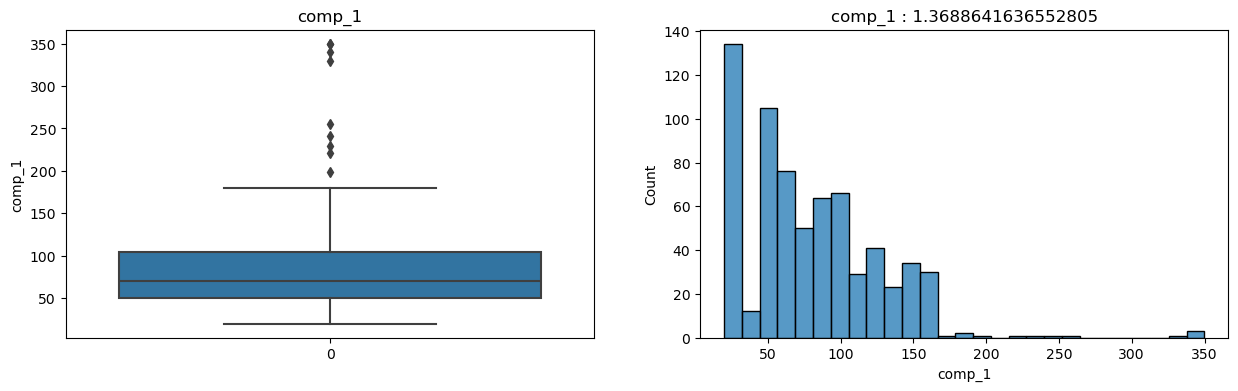

ps1


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


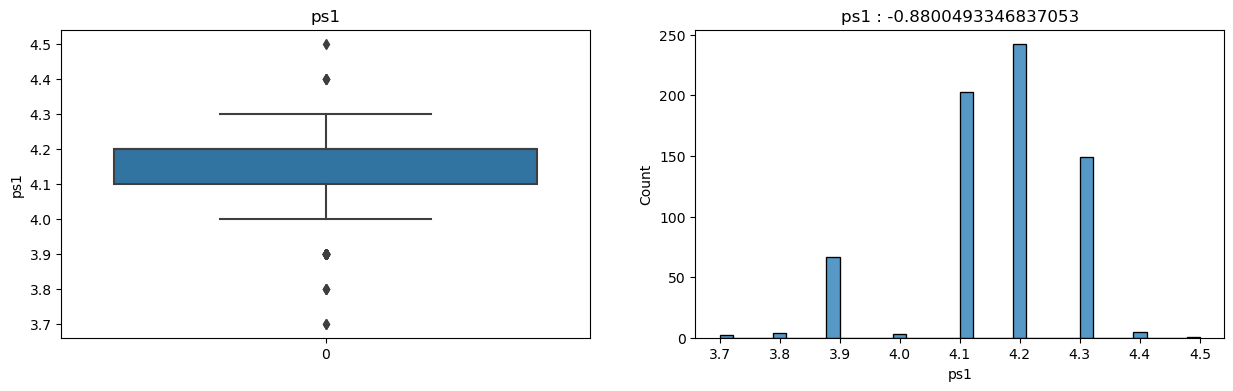

fp1


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


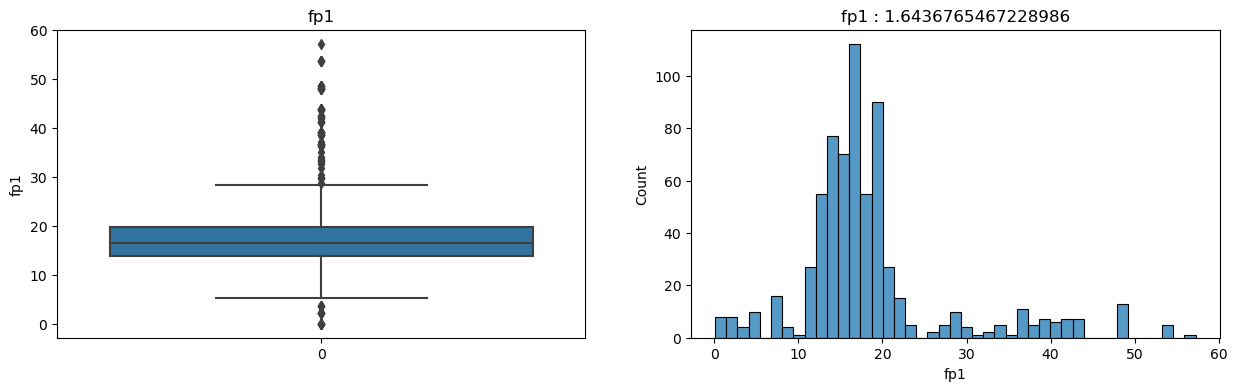

comp_2


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


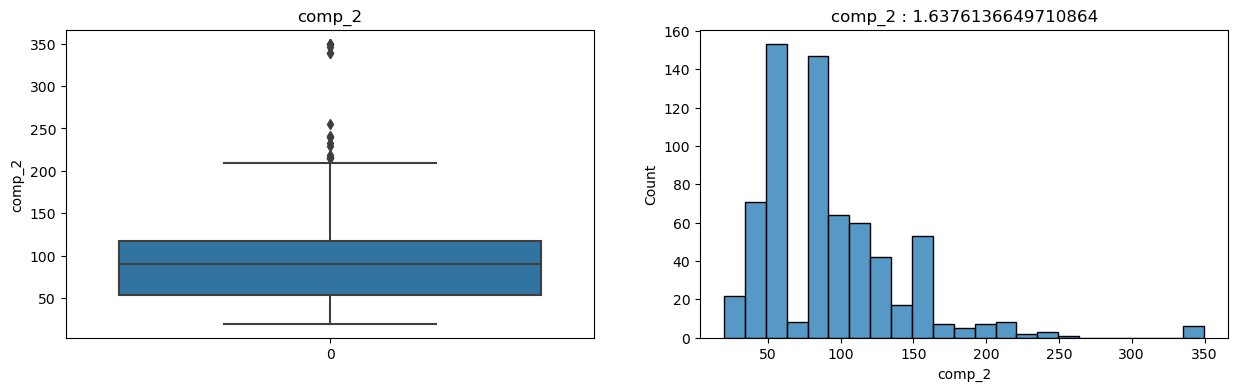

ps2


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


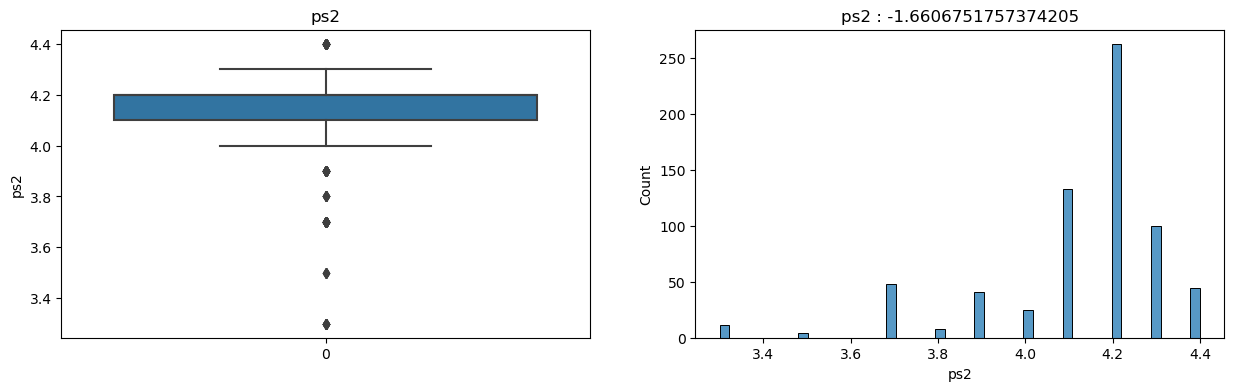

fp2


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


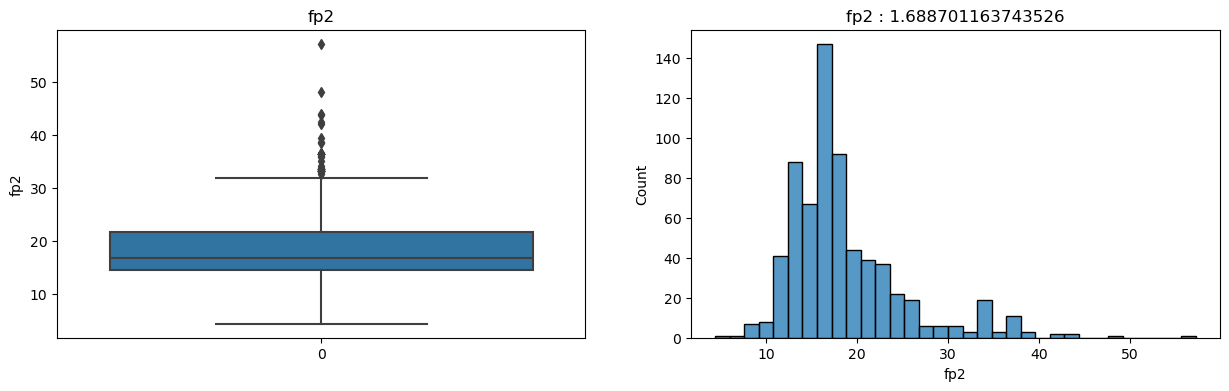

comp_3


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


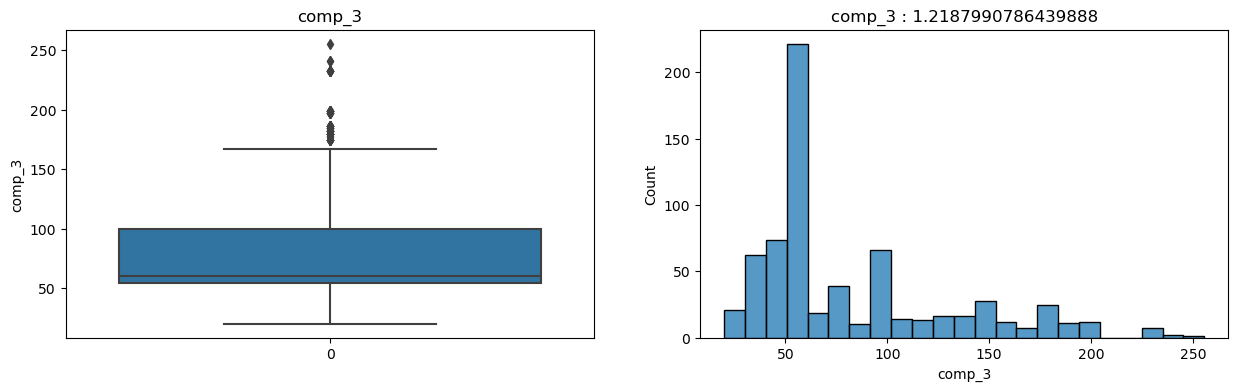

ps3


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


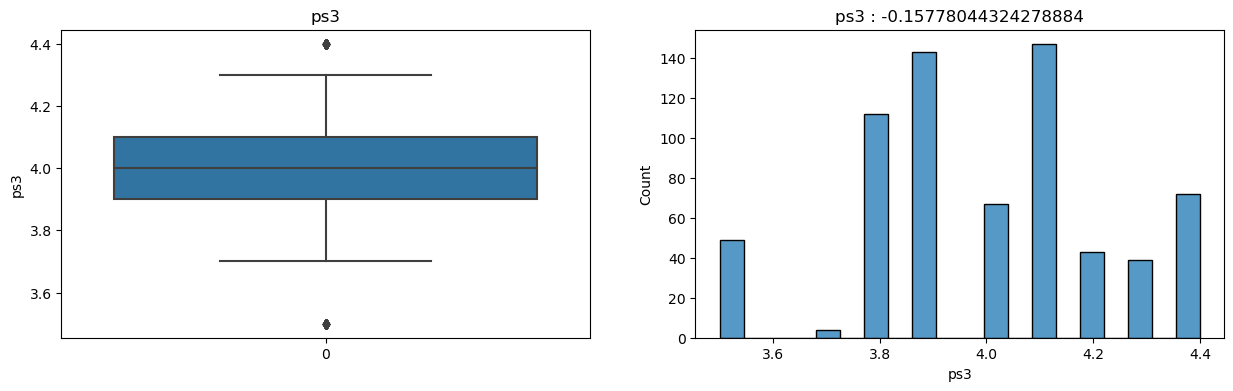

fp3


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


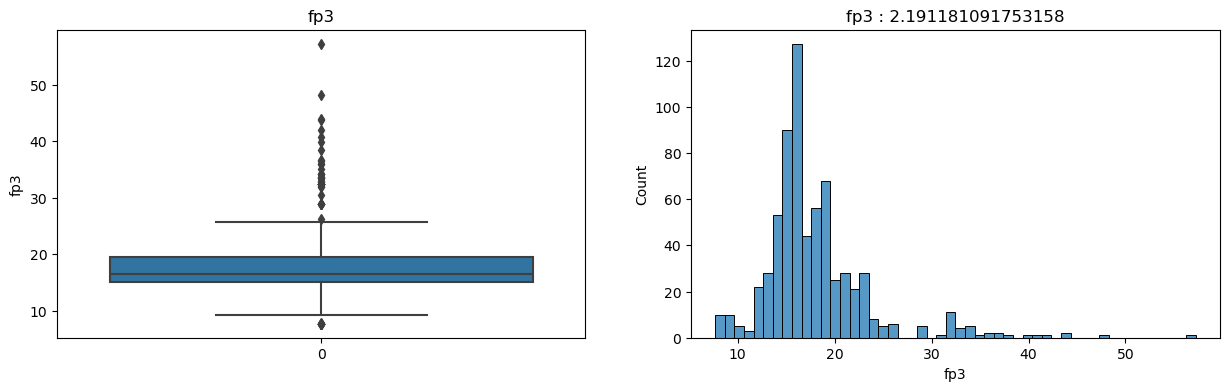

lag_price


C:\Users\harsh\.matplotlib\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


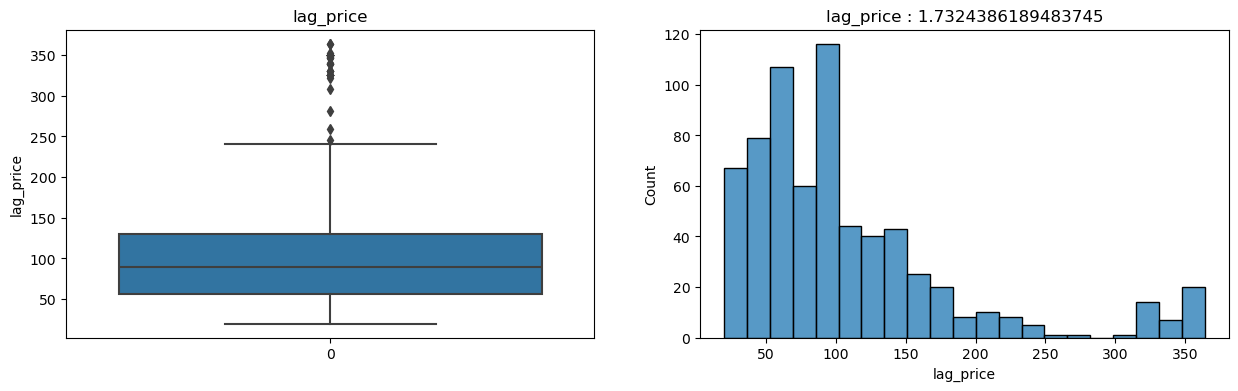

In [27]:
#in below boxplot and histogram are used to show patterns of variables using skewness
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    ax=sns.boxplot(data=retail[col])
    ax.set_title(f"{col}")
    ax.set_ylabel(col)
    
    plt.subplot(1, 2, 2)
    ax=sns.histplot(retail[col])
    ax.set_title(f'{col} : {retail[col].skew()}')
    ax.set_xlabel(col)
    plt.show()

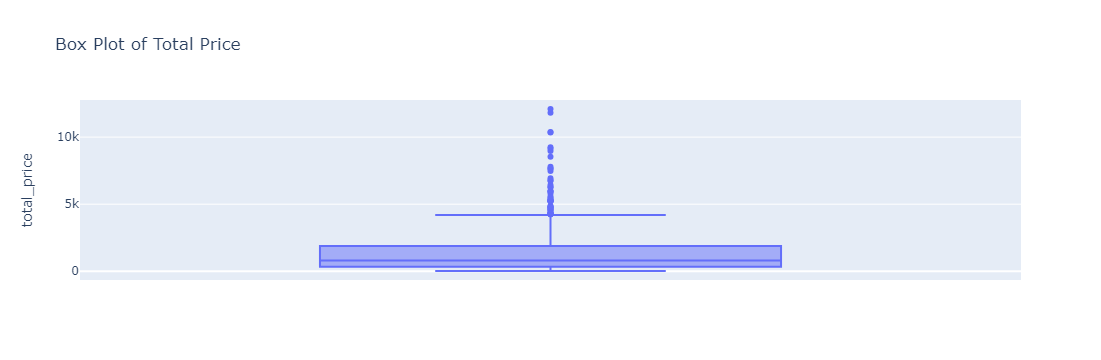

In [29]:
#distribution of total price using box plot
fig = px.box(retail, 
             y='total_price', 
             title='Box Plot of Total Price')
fig.show()

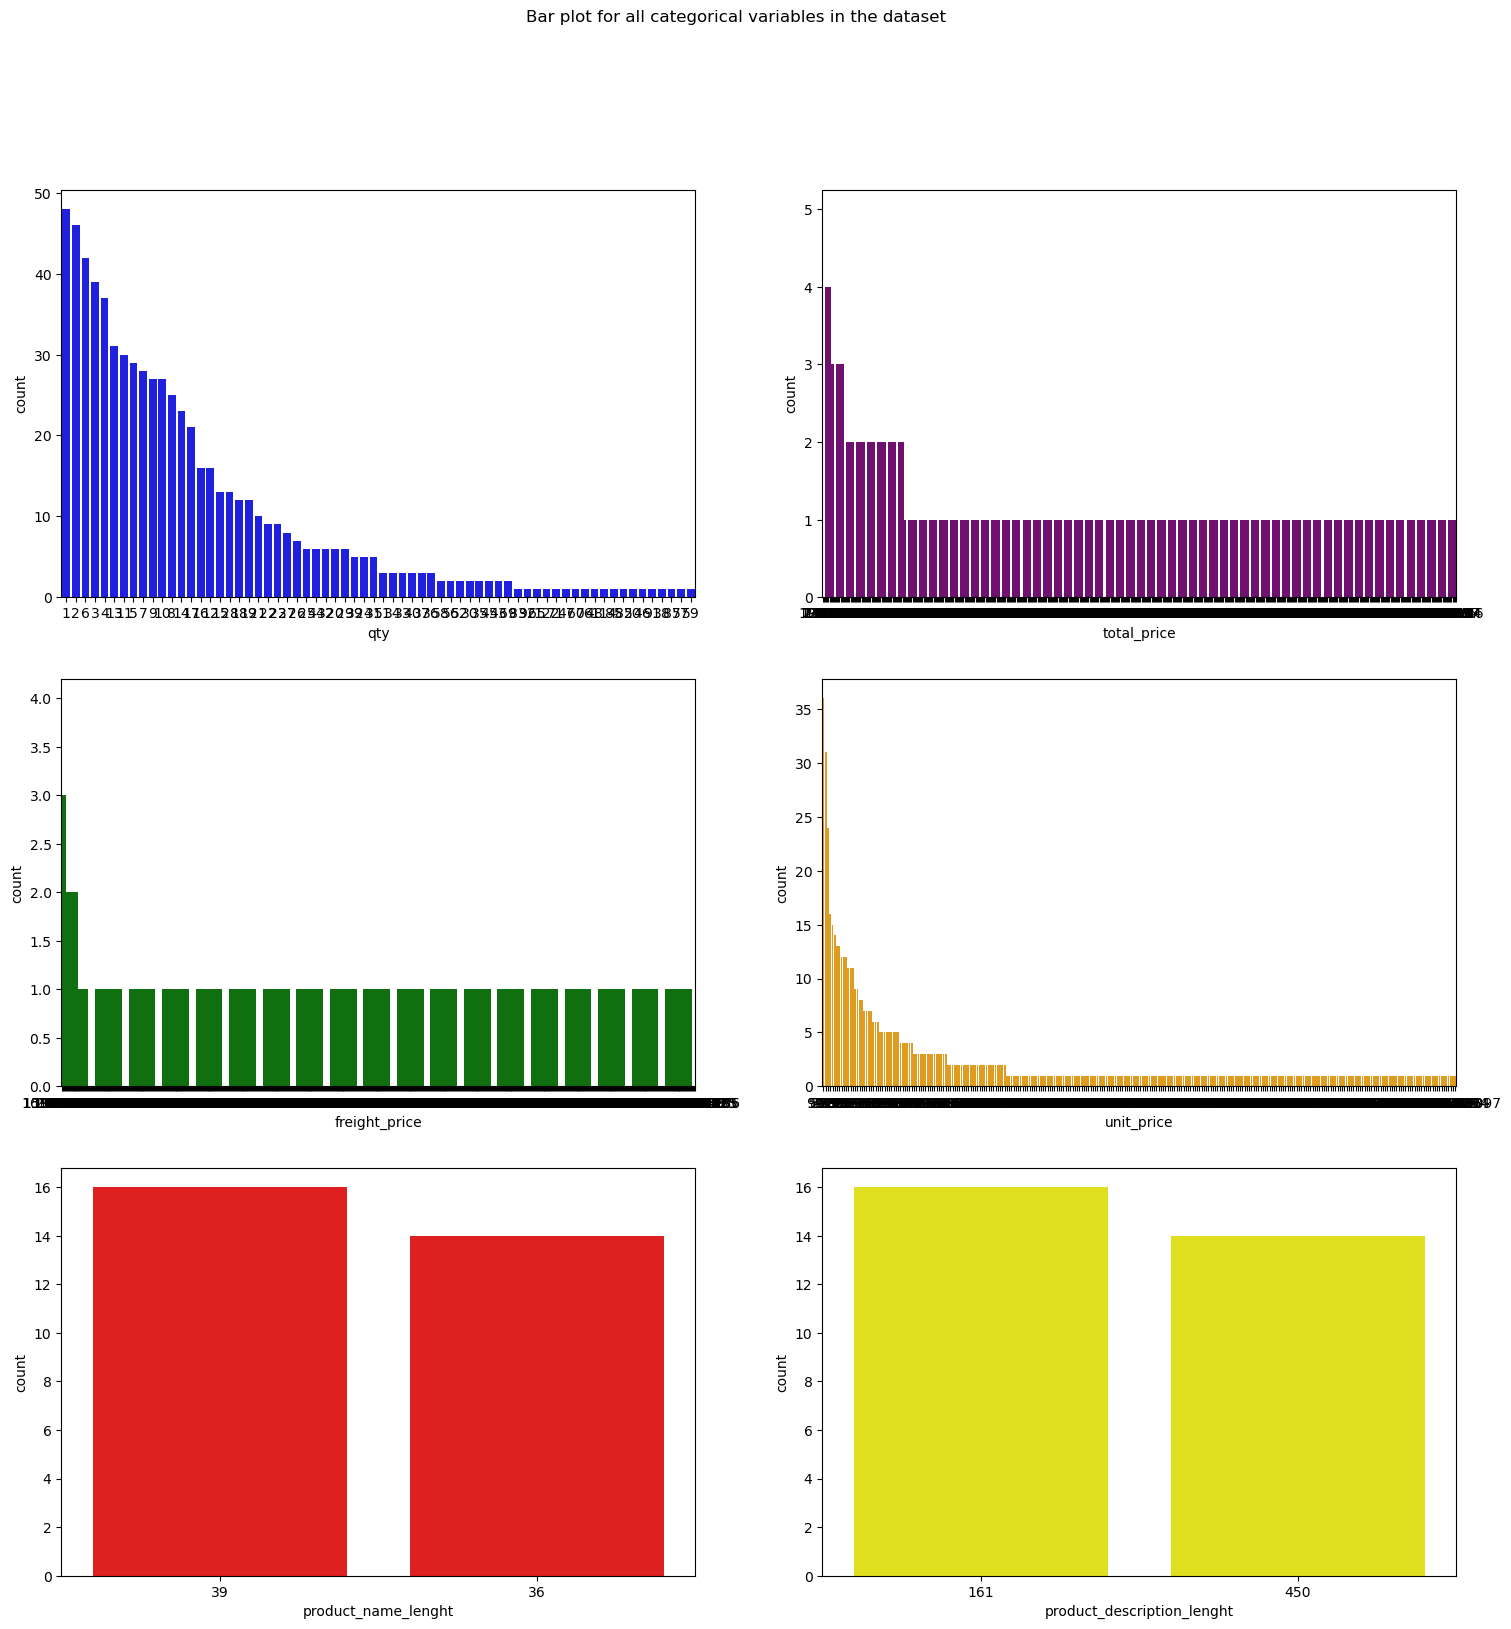

In [30]:
#categorical are being visualized using box plot
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = "qty", data = retail, color = 'blue', 
              order=retail["qty"].value_counts().index);
sns.countplot(ax = axes[0, 1], x = "total_price", data = retail, color = 'purple', 
              order=retail["total_price"].value_counts().index);
sns.countplot(ax = axes[1, 0], x = "freight_price", data = retail, color = 'green', 
              order=retail["freight_price"].value_counts().index);
sns.countplot(ax = axes[1, 1], x = "unit_price", data = retail, color = 'orange', 
              order=retail["unit_price"].value_counts().index);
sns.countplot(ax = axes[2, 0], x = "product_name_lenght", data = retail, color = 'red', 
              order=retail["product_name_lenght"].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = "product_description_lenght", data = retail, color = 'yellow', 
              order=retail["product_description_lenght"].head(20).value_counts().index)
plt.show()

In [31]:
#check unique values and its frequency using variables
for var in retail.columns:
    print(retail[var].value_counts())

product_id
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         13
furniture2    13
health2       13
furniture1    13
perfumery1    13
cool5         13
watches7      12
furniture3    12
consoles1     12
health4       11
bed3          11
computers3    10
computers2    10
bed4          10
consoles2     10
watches4      10
watches5      10
furniture4    10
watches8      10
health1        9
cool4          9
computers6     8
computers5     8
health3        8
cool3          7
health10       7
health6        7
bed5           5
Name: count, dtype: int64
product_category_name
garden_tools             160
health_beauty            130

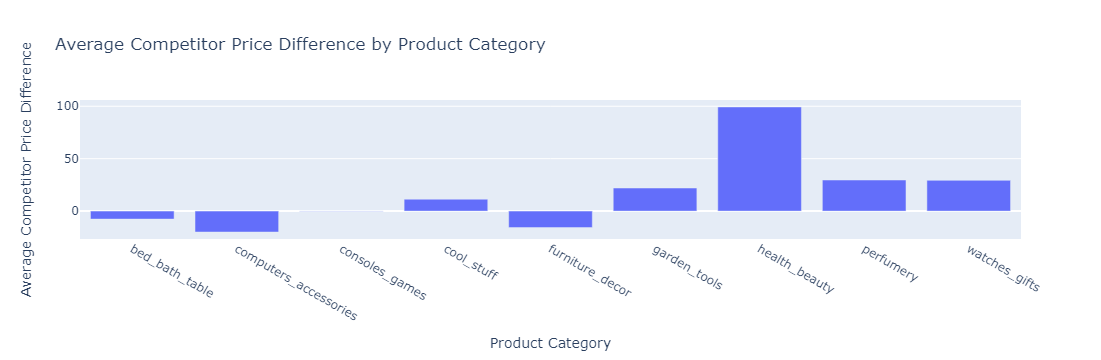

In [33]:
#calculate average competitor price difference by product category
retail['comp_price_diff'] = retail['unit_price'] - retail['comp_1'] 

avg_price_diff_by_category = retail.groupby('product_category_name')['comp_price_diff'].mean().reset_index()

fig = px.bar(avg_price_diff_by_category, 
             x='product_category_name', 
             y='comp_price_diff', 
             title='Average Competitor Price Difference by Product Category')
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Average Competitor Price Difference'
)
fig.show()

# FEATURE ENGINEERING

In [34]:
 retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
#train-test split
train_retail, test_retail = train_test_split(retail, test_size=0.2, random_state=42)

In [37]:
#specify features and target variable
features = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume']
target = 'total_price'

In [38]:
x = retail[features]
y = retail[target]

In [39]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
#printing train and test shape
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (540, 17) (540,)
Testing set shape: (136, 17) (136,)


In [41]:
x_train, y_train = train_retail[features], train_retail[target]
x_test, y_test = test_retail[features], test_retail[target]

In [42]:
#initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
#printing the shape
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (540, 17)
Shape of x_test : (136, 17)
Shape of y_train : (540,)
Shape of y_test : (136,)


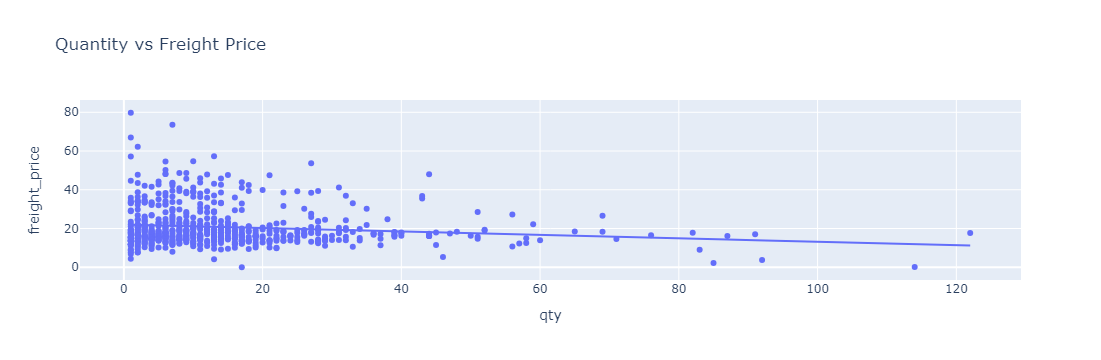

In [44]:
#relationship between quantity and freight price
fig = px.scatter(retail, 
                 x='qty', 
                 y='freight_price', 
                 title='Quantity vs Freight Price', trendline="ols")
fig.show()

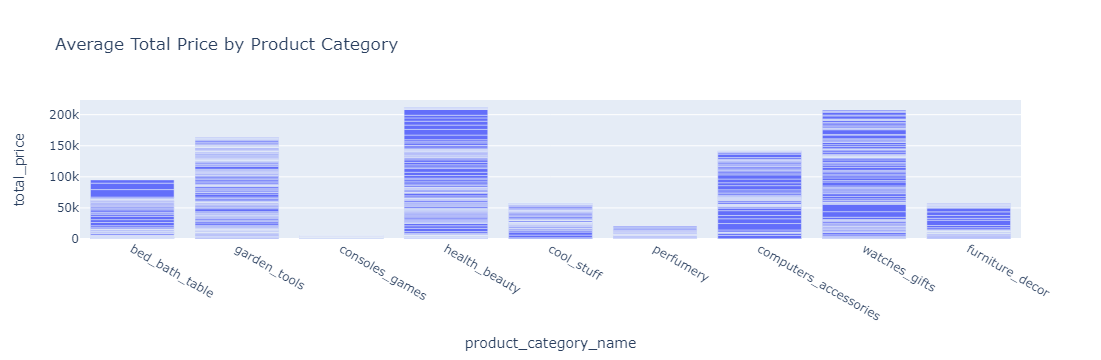

In [45]:
#average total price by product category
fig = px.bar(retail, x='product_category_name', 
             y='total_price', 
             title='Average Total Price by Product Category')
fig.show()

In [46]:
x_train.head()

qty  total_price  freight_price  unit_price  product_name_lenght  \
218    6       894.00      17.003333  149.000000                   35   
18    20      1956.00      39.897500   97.588235                   36   
567    6       589.94      34.083333   98.323333                   58   
408    3       176.97      12.083333   58.990000                   59   
657   11       876.90      14.414545   79.800000                   33   

     product_description_lenght  product_photos_qty  product_weight_g  \
218                         591                   3               444   
18                          450                   1              9000   
567                        1893                   1              5950   
408                         492                   2               200   
657                         256                   1               180   

     product_score  customers  weekday  weekend  holiday  month  year  \
218            4.0         73       21       10        1     12  2017   
18             4.1         34       23        8        1      5  2017   
567            4.3         46       23        8        1      8  2018   
408            3.9        127       23        8        1      8  2018   
657            3.5         78       23        8        3      5  2018   

             s  volume  
218   8.108108    4480  
18   19.047619   19656  
567   7.020408    8000  
408   8.964286    3960  
657   6.470588    2210

# MODELING

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
#make predictions on test set
y_pred = model.predict(x_test)

In [49]:
#evuluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

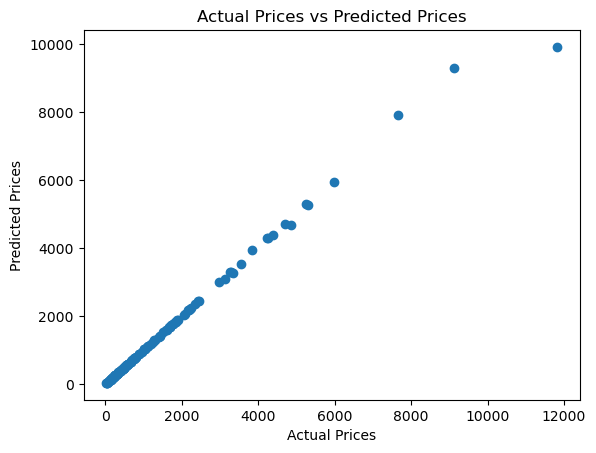

In [50]:
#visualize predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

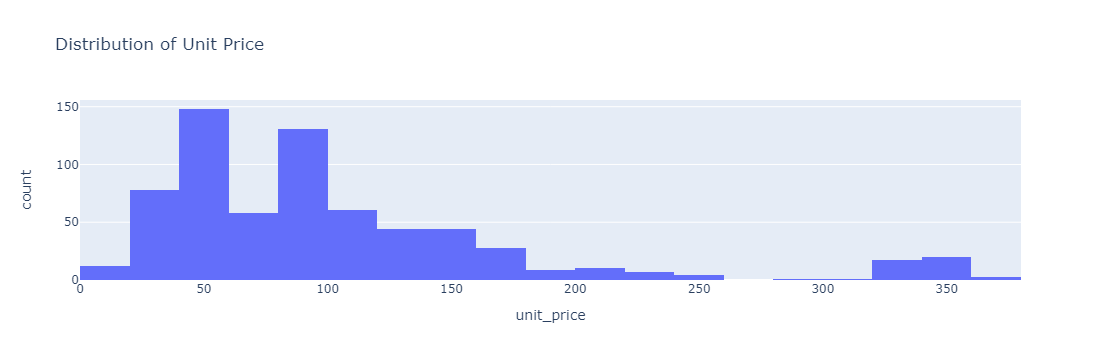

In [51]:
#distribution of unit prices of product
fig = px.histogram(retail, 
                   x='unit_price', 
                   nbins=30, 
                   title='Distribution of Unit Price')
fig.show()

In [52]:
#train the model
model = LinearRegression(fit_intercept=True,)
model.fit(x_train, y_train)

LinearRegression()

In [53]:
#finding mse
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 27592.43380403186


In [54]:
from math import sqrt

In [55]:
#finding rmse
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 166.1097041236058


In [56]:
x_train, x_test, y_train, y_test = train_test_split(retail[features], retail[target], test_size=0.2, random_state=42)

In [57]:
#confusion matrix for train set
def visualize(y_train, y_train_pred, y_test, y_test_pred):
    cm_train = confusion_matrix(y_train, y_train_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix for Training Set')
    plt.ylabel('True')
plt.show()

In [58]:
#confusion matrix for test set
def visualize(y_train, y_train_pred, y_test, y_test_pred):
    cm_test = confusion_matrix(y_test, y_test_pred)    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
plt.show()

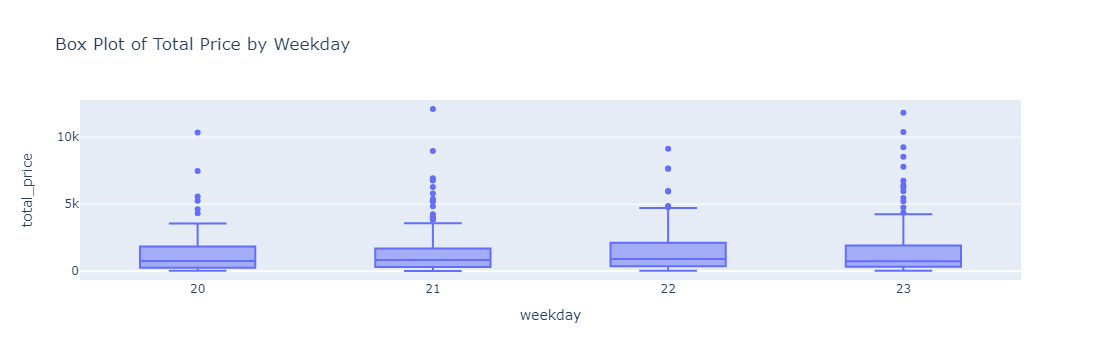

In [59]:
#distribution of total price by weekday using box plot
fig = px.box(retail, 
             x='weekday', 
             y='total_price', 
             title='Box Plot of Total Price by Weekday')
fig.show()

# LINEAR REGRESSION

In [78]:
# Define your features and target variable
X = retail[['product_score', 'customers', 'holiday', 'month']]
y = retail['lag_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 76.92883697857867
Test RMSE: 76.3111539894119


# RANDOM FOREST

In [82]:
X = retail[['product_score', 'customers', 'holiday', 'month']]
y = retail['lag_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 43.74458048125892
Test RMSE: 91.90763080042659


# DECISION TREE

In [87]:
X = retail[['product_score', 'customers', 'holiday', 'month']]
y = retail['lag_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Fit the model on the training data
tree_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can visualize the decision tree
# Note: Visualization requires Graphviz and pydotplus libraries
# You may need to install them using pip
'''
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
'''

Mean Squared Error: 13445.073190043482


'\nfrom sklearn.tree import export_graphviz\nfrom sklearn.externals.six import StringIO  \nfrom IPython.display import Image  \nimport pydotplus\n\ndot_data = StringIO()\nexport_graphviz(tree_regressor, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True, feature_names=X.columns)\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \nImage(graph.create_png())\n'